In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import *
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
import pandas as pd
from RegressionUtils import *
from pathlib import Path

In [2]:
# all_csvs = [str(p) for p in Path('Results-Aidan').rglob('*.csv')]
# all_csvs = [p for p in all_csvs if "dropout" in p] + [p for p in all_csvs if "dropout" not in p]
all_csvs_do = ['Results-Aidan/cdms_dnn_results/dropout_networks/dnn2/dnn2_reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn5/dnn5_reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn10/dnn10_reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn2/dnn2_full_npa_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn5/dnn5_full_npa_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn10/dnn10_full_npa_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn2/dnn2_full_results.csv',
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn5/dnn5_full_results.csv', 
 'Results-Aidan/cdms_dnn_results/dropout_networks/dnn10/dnn10_full_results.csv']

all_csvs_l1es = ['Results-Aidan/cdms_dnn_results/L1ES_networks/DNN-10/DNN-10_Reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/CNN/CNN_Reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/LargeDNN/LargeDNN_Reduced_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/DNN-10/DNN-10_FullNPA_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/CNN/CNN_FullNPA_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/LargeDNN/LargeDNN_FullNPA_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/DNN-10/DNN-10_Full_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/CNN/CNN_Full_results.csv',
 'Results-Aidan/cdms_dnn_results/L1ES_networks/LargeDNN/LargeDNN_Full_results.csv'
 ]

In [3]:
def do_plot(all_csvs, tag = ''):

    err_tags = []
    terr_data = []
    verr_data = []

    for f in all_csvs:
        errs = np.array(pd.read_csv(f, header=None))
        t = list(errs[:,2])
        v = list(errs[:,1])
        terr_data.append(t)
        verr_data.append(v)
        if 'L1ES_networks' in f:
            etype = f.split('/')[-1].replace('.csv', '')
            s = ''
            s += etype.split('_')[0]
            s += ' ('
            if 'Reduced' in etype:
                s += 'S'
            elif 'FullNPA' in etype:
                s += 'X-nA'
            elif 'Full' in etype:
                s += 'X-A'
            s += '-L1ES)'
            err_tags.append(s)
        else:
            etype = f.split('/')[-1].replace('.csv', '')
            s = ''
            s += etype.split('_')[0].upper().replace('DNN', 'DNN-')
            s += ' ('
            if 'reduced' in etype:
                s += 'S'
            elif 'full_npa' in etype:
                s += 'X-nA'
            elif 'full' in etype:
                s += 'X-A'
            s += '-DO)'
            err_tags.append(s)

    terr_data = np.array(terr_data).T
    verr_data = np.array(verr_data).T

    import matplotlib.patches as mpatches


    plt.figure(figsize=(9,18))

    bp = plt.boxplot(verr_data, showfliers=False,vert=1, patch_artist=True)
    plt.setp(bp["boxes"], facecolor='green')
    plt.setp(bp["medians"], color='yellow')

    bp = plt.boxplot(terr_data, showfliers=False,vert=1, notch=True,  patch_artist=True)
    plt.setp(bp["boxes"], facecolor='red')
    plt.setp(bp["medians"], color='yellow')
    plt.xticks(range(1,len(err_tags)+1),err_tags,fontsize = 30,rotation=90)
    plt.ylabel("RMSE", fontsize=30)
    plt.yticks(fontsize=30)
    val_patch = mpatches.Patch(color='green', label='Validation')
    test_patch = mpatches.Patch(color='red', label='Test')
    plt.axhline(y=1.25, color='b', linestyle='--')
    plt.axhline(y=1.50, color='b', linestyle='--')
    plt.legend(handles=[val_patch, test_patch], fontsize = 30)
    plt.tight_layout()
    plt.savefig("Plots/DNNPlots/LossSummary{}.png".format(tag))
    plt.show()
    
    np.save("Plots/DNNPlots/LossSummary{}.png".format(tag) + ".test_err.DATA.npy", terr_data)

    np.save("Plots/DNNPlots/LossSummary{}.png".format(tag) + ".val_err.DATA.npy", verr_data)

    np.save("Plots/DNNPlots/LossSummary{}.png".format(tag) + ".model_tags.DATA.npy", err_tags)

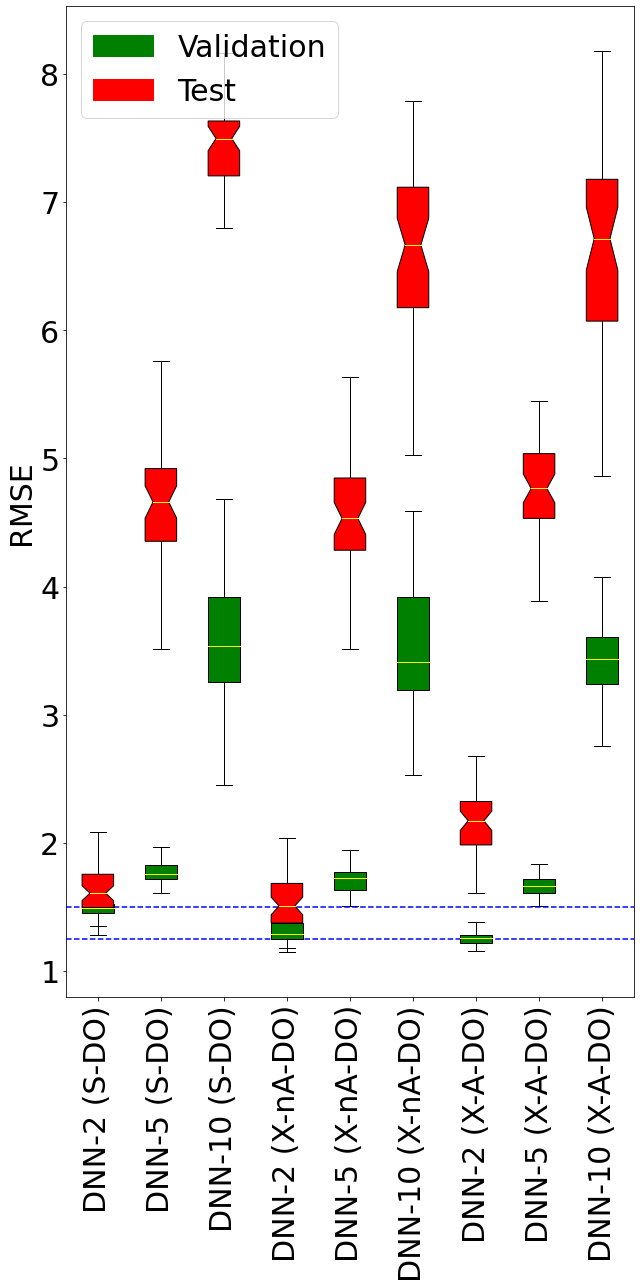

In [4]:
do_plot(all_csvs_do, tag = '_DO')

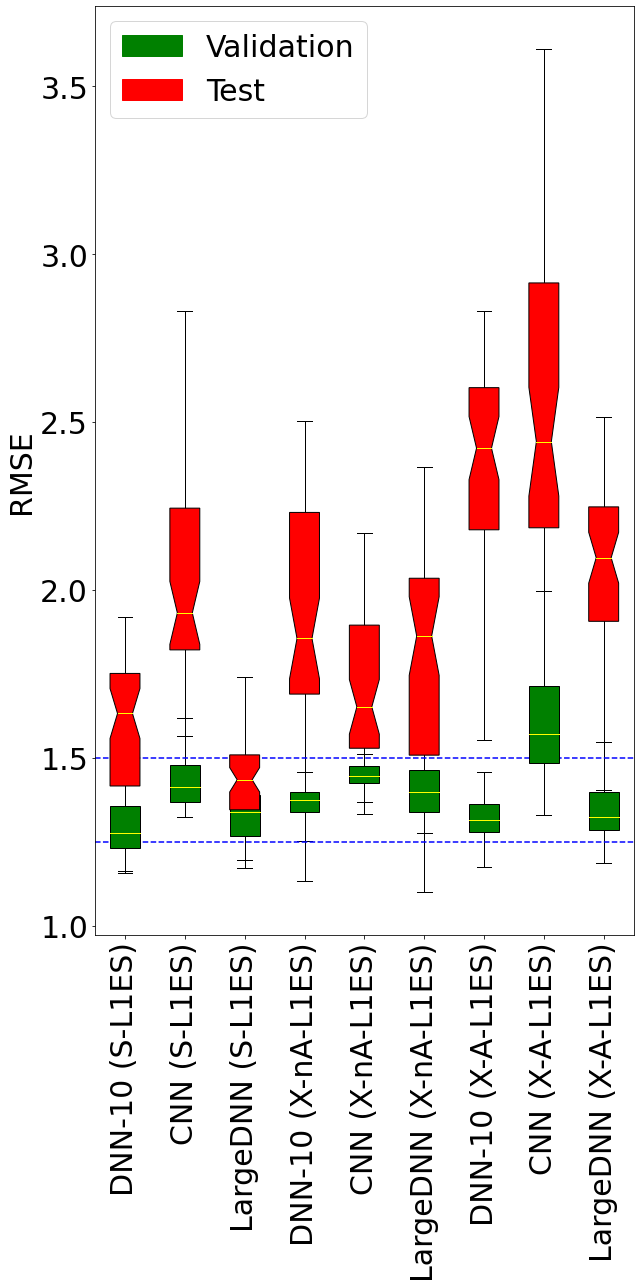

In [5]:
do_plot(all_csvs_l1es, tag = '_L1ES')